# Forward diffusion

https://en.wikipedia.org/wiki/Diffusion_model

[*********************100%***********************]  1 of 1 completed


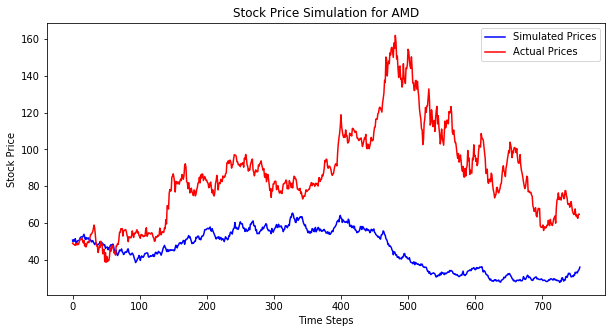

In [1]:
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Input
symbol = 'AMD'
start = '2020-01-01'
end = '2023-01-01'

# Read data
dataset = yf.download(symbol, start, end)

# Prepare data
data = dataset['Adj Close'].values

def simulate_gbm(S0, mu, sigma, T, dt, num_steps):
    """
    Simulate a Geometric Brownian Motion (GBM) process.

    Parameters:
        S0 (float): Initial stock price.
        mu (float): Expected return (drift).
        sigma (float): Volatility.
        T (float): Total time period (in years).
        dt (float): Time step (in years).
        num_steps (int): Number of time steps.

    Returns:
        np.array: An array of simulated stock prices over time.
    """
    t = np.linspace(0, T, num_steps + 1)
    W = np.random.standard_normal(size=num_steps + 1)
    W = np.cumsum(W) * np.sqrt(dt)  # Brownian motion
    S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)
    return S

# Parameters for the simulation
S0 = data[0]  # Initial stock price
mu = 0.12  # Expected return (drift)
sigma = 0.3  # Volatility
T = 3.0  # Total time period (in years)
dt = 1/252  # Time step (daily)
num_steps = int(T / dt)

# Simulate the GBM process
simulated_prices = simulate_gbm(S0, mu, sigma, T, dt, num_steps)

# Plot the simulated prices
plt.figure(figsize=(10, 5))
plt.plot(simulated_prices, label='Simulated Prices', color='blue')
plt.plot(data, label='Actual Prices', color='red')
plt.title(f'Stock Price Simulation for {symbol}')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()